# **D212 Performance Assessment 3:** Market Basket Analysis  

**Student:** Chris Fischer  
**ID:** 011933891  
**Dataset:** Medical Market Basket 
---

### *Research Question*  

Can we increase efficiency in our hospital pharmacies by optimizing the arrangement of medications in inventory using market basket analysis?

## Initialization
---

In [11]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#allow pd.describe to show all columns of the data frame (Chum, 2020) https://stackoverflow.com/questions/38746112/python-pandas-prevent-line-break-in-cell
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False

#load church_missing_data.csv
df = pd.read_csv('medical_market_basket.csv')

## Preparation
---

In [12]:
# Examine the dataframe
print(df.info(verbose=False))
print(df.head(6))

# Remove the blank rows
df = df[df['Presc01'].notna()]
df.reset_index(drop=True, inplace=True)

# Verify the results
print(df.info(verbose=False))
print(df.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Columns: 20 entries, Presc01 to Presc20
dtypes: object(20)
memory usage: 2.3+ MB
None
      Presc01            Presc02                    Presc03       Presc04    Presc05     Presc06     Presc07      Presc08     Presc09      Presc10 Presc11   Presc12                  Presc13           Presc14  Presc15         Presc16        Presc17       Presc18       Presc19    Presc20
0         NaN                NaN                        NaN           NaN        NaN         NaN         NaN          NaN         NaN          NaN     NaN       NaN                      NaN               NaN      NaN             NaN            NaN           NaN           NaN        NaN
1  amlodipine  albuterol aerosol                allopurinol  pantoprazole  lorazepam  omeprazole  mometasone  fluconozole  gabapentin  pravastatin  cialis  losartan  metoprolol succinate XL  sulfamethoxazole  abilify  spironolactone  albuterol HFA  levofloxacin  p

In [13]:
df.head(6)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
1,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cialis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Transform the df into a list of lists (Kamara, 2024)
transactions = df.stack().groupby(level=0).apply(list).values.tolist()

In [15]:
# Transform list of lists into one-hot encoded dataframe (Yasik, 2023)
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
df_onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Standardize column casing
df_onehot.columns = df_onehot.columns.str.lower()

# View results
df_onehot.info()
df_onehot.head(3)

# Export the prepared file
df_onehot.to_csv('medical_market_basket_prepared.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, duloxetine to zolpidem
dtypes: bool(119)
memory usage: 871.8 KB


## Analysis
---

In [16]:
# Use apriori to eliminate infrequent items
support = 0.02
length = 2
frequent_items = apriori(df_onehot, min_support=support, max_len=length, use_colnames=True)
frequent_items.sort_values('support', ascending=False).reset_index(drop=True).head(10)

,support,itemsets
0,0.238368,(abilify)
1,0.179709,(amphetamine salt combo xr)
2,0.174110,(carvedilol)
3,0.170911,(glyburide)
4,0.163845,(diazepam)
5,0.132116,(losartan)
6,0.129583,(atorvastatin)
7,0.098254,(lisinopril)
8,0.095321,(metoprolol)
9,0.095054,(doxycycline hyclate)


In [17]:
# Create association rules
metric = 'lift'
treshold = 1.0

rules = association_rules(frequent_items, metric=metric, 
                          min_threshold=treshold)[['antecedents','consequents','support','lift','confidence']]

# Convert the frozensets into strings (Herfert, 2019)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules = rules.sort_values('confidence',ascending=False).reset_index(drop=True).round(3)
print(f'Number of rules selected: {rules.shape[0]}\n')

# Export the rules file
rules.to_csv('medical_market_basket_rules.csv', index=False)

Number of rules selected: 94



In [18]:
print('Top rules sorted by confidence descending')
rules.head(3)

Top rules sorted by confidence descending


,antecedents,consequents,support,lift,confidence
0,metformin,abilify,0.023,1.915,0.456
1,glipizide,abilify,0.028,1.758,0.419
2,lisinopril,abilify,0.041,1.748,0.417


## Data Summary and Implications
---

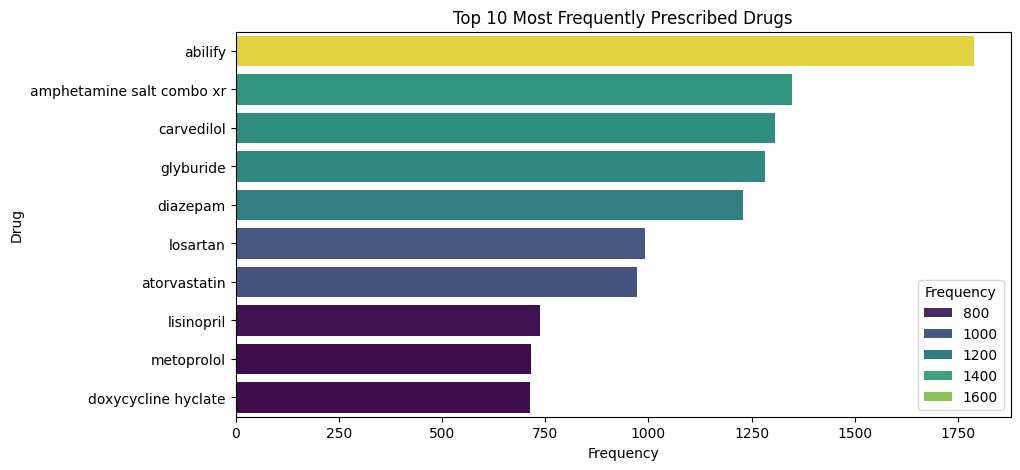

In [19]:
# Identify the most frequently prescribed drugs (Kamara, 2024)
most_frequent = df.apply(pd.Series.value_counts,axis=0).transpose().sum().sort_values(ascending=False)

# Transform and plot
most_frequent = most_frequent.to_frame(name='Frequency')
most_frequent['DrugName'] = most_frequent.index
most_frequent.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="DrugName", data=most_frequent.head(10), hue="Frequency", palette="viridis")
plt.title("Top 10 Most Frequently Prescribed Drugs")
plt.xlabel("Frequency")
plt.ylabel("Drug")
plt.show()


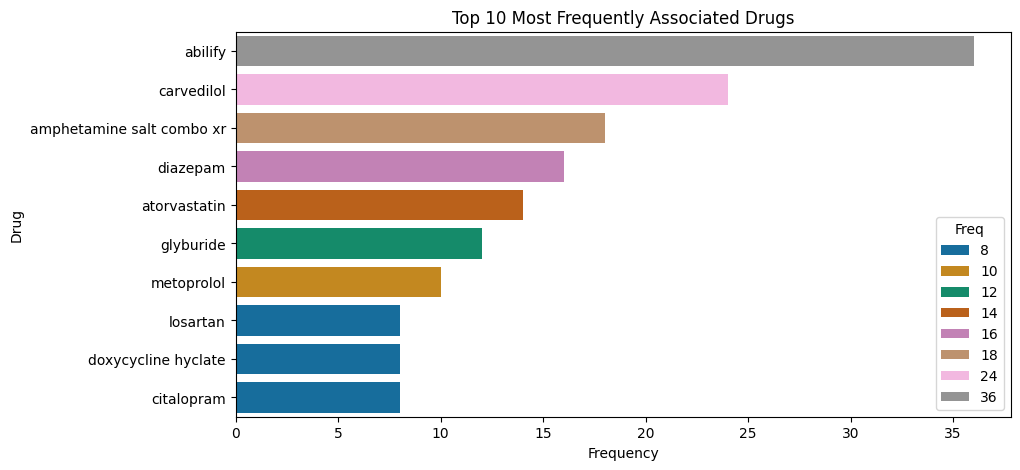

In [20]:
# See which drugs occur most frequently in the retained rules
antecedents = rules.groupby("antecedents").size().reset_index(name="Freq").sort_values("Freq", ascending=False).rename(columns={"antecedents": "drugName"}).set_index('drugName')
consequents = rules.groupby("consequents").size().reset_index(name="Freq").sort_values("Freq", ascending=False).rename(columns={"consequents": "drugName"}).set_index('drugName')
most_frequent = antecedents.add(consequents, fill_value = 0).sort_values("Freq", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x="Freq", y="drugName", data=most_frequent, hue="Freq", palette="colorblind")
plt.title("Top 10 Most Frequently Associated Drugs")
plt.xlabel("Frequency")
plt.ylabel("Drug")
plt.show()